In [5]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

In [9]:
fake_data=pd.read_csv("Fake.csv")
real_data=pd.read_csv("True.csv")

In [19]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [11]:
real_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


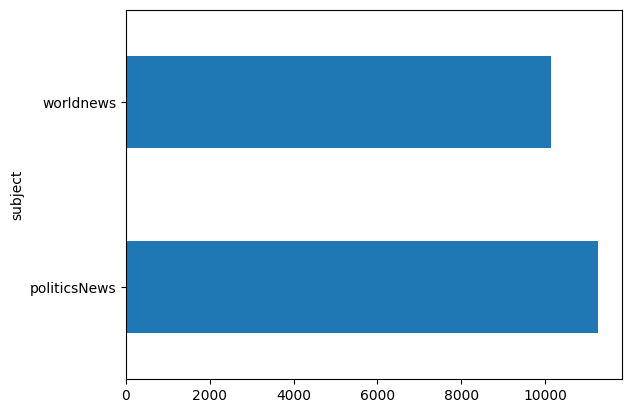

In [12]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

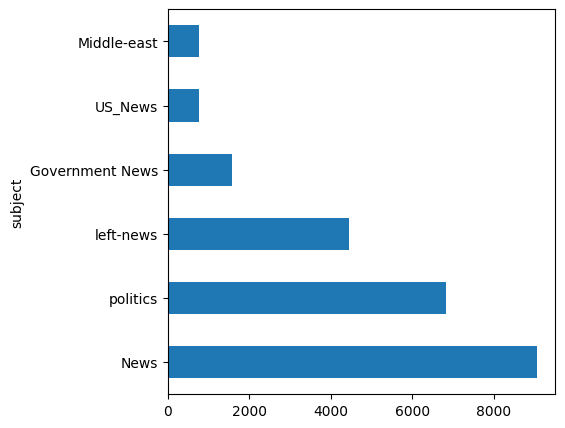

In [13]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

In [14]:
wordcld_mask=np.array(Image.open("flower.png"))

In [16]:
wordcld_text=" ".join(real_data["text"].tolist())

In [21]:
wordcld_text[0:1000]

'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

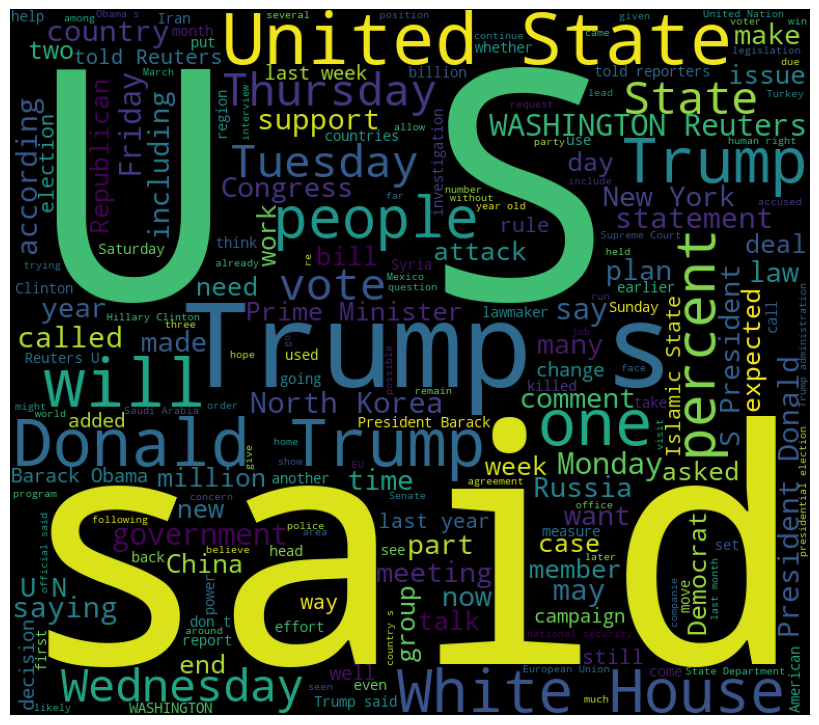

In [22]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [23]:
fake_text=" ".join(fake_data["text"].tolist())

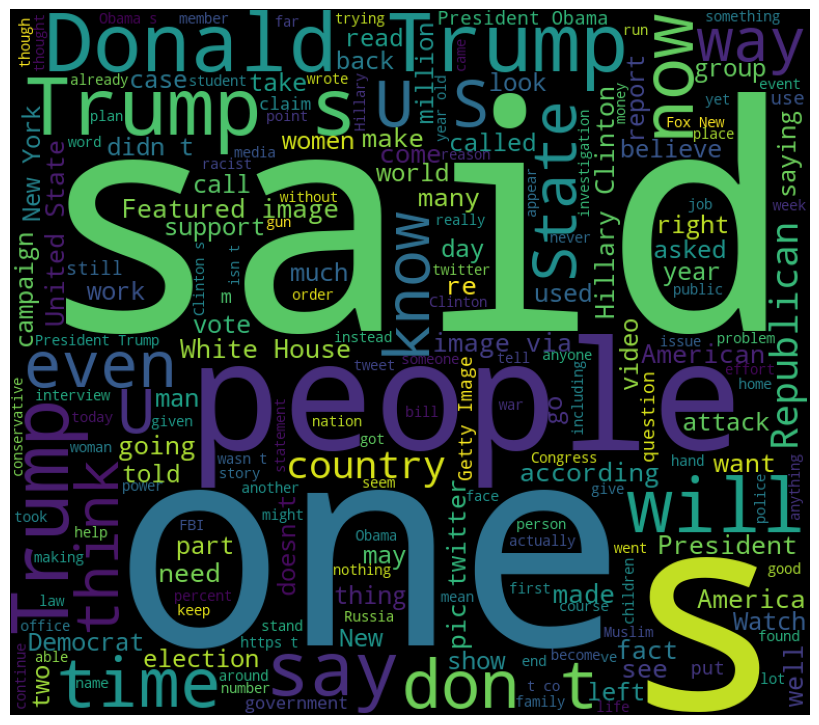

In [24]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
fake_data["label"]="fake"
real_data["label"]="real"

In [26]:
final_data= pd.concat([fake_data,real_data])
final_data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",real


In [27]:
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data

,title,text,subject,date,label
0,RUSSIA Tells Sore Loser Obama To Produce Some ...,The Russians may not have hacked our elections...,left-news,"Dec 16, 2016",fake
1,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,The mainstream media will never show you both ...,left-news,"Jul 21, 2017",fake
2,U.S. officials discussing withholding some aid...,WASHINGTON (Reuters) - U.S. officials are disc...,politicsNews,"July 26, 2017",real
3,Time Magazine Cover PERFECTLY Illustrates Wha...,There s no doubt about it: Trump and his campa...,News,"August 11, 2016",fake
4,Trudeau defends Canada's dairy system against ...,OTTAWA (Reuters) - Canadian Prime Minister Jus...,politicsNews,"April 20, 2017",real
...,...,...,...,...,...
44893,Obama’s Epic Win Vs Ebola The Media Never Tol...,The world is now reporting zero cases of ebola...,News,"January 15, 2016",fake
44894,"Trump hires Republican insider, conservative f...",WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"November 13, 2016",real
44895,"Exclusive: Returning Rohingya may lose land, c...","SITTWE, Myanmar (Reuters) - Rohingya Muslims w...",worldnews,"October 22, 2017",real
44896,"Angry over U.S. healthcare fail, Trump voters ...","NEW PORT RICHEY, Fla. (Reuters) - The day aft...",politicsNews,"March 26, 2017",real


In [28]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [33]:
final_data.drop(["subject","date"], axis=1, inplace = True)
final_data

,title,text,label
0,RUSSIA Tells Sore Loser Obama To Produce Some ...,The Russians may not have hacked our elections...,fake
1,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,The mainstream media will never show you both ...,fake
2,U.S. officials discussing withholding some aid...,WASHINGTON (Reuters) - U.S. officials are disc...,real
3,Time Magazine Cover PERFECTLY Illustrates Wha...,There s no doubt about it: Trump and his campa...,fake
4,Trudeau defends Canada's dairy system against ...,OTTAWA (Reuters) - Canadian Prime Minister Jus...,real
...,...,...,...
44893,Obama’s Epic Win Vs Ebola The Media Never Tol...,The world is now reporting zero cases of ebola...,fake
44894,"Trump hires Republican insider, conservative f...",WASHINGTON (Reuters) - President-elect Donald ...,real
44895,"Exclusive: Returning Rohingya may lose land, c...","SITTWE, Myanmar (Reuters) - Rohingya Muslims w...",real
44896,"Angry over U.S. healthcare fail, Trump voters ...","NEW PORT RICHEY, Fla. (Reuters) - The day aft...",real


In [30]:
final_data.label.value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

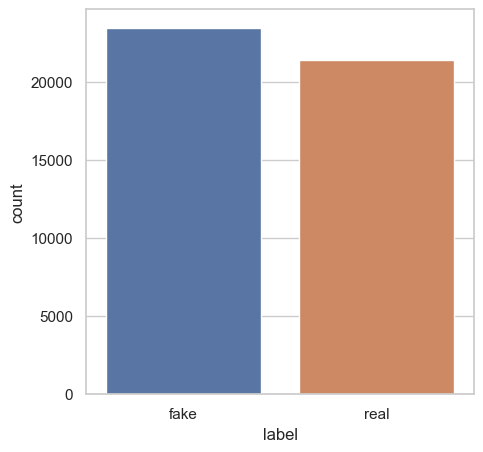

In [31]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [34]:
final_data["text"]=final_data["title"]+final_data["text"]
final_data

,title,text,label
0,RUSSIA Tells Sore Loser Obama To Produce Some ...,RUSSIA Tells Sore Loser Obama To Produce Some ...,fake
1,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,fake
2,U.S. officials discussing withholding some aid...,U.S. officials discussing withholding some aid...,real
3,Time Magazine Cover PERFECTLY Illustrates Wha...,Time Magazine Cover PERFECTLY Illustrates Wha...,fake
4,Trudeau defends Canada's dairy system against ...,Trudeau defends Canada's dairy system against ...,real
...,...,...,...
44893,Obama’s Epic Win Vs Ebola The Media Never Tol...,Obama’s Epic Win Vs Ebola The Media Never Tol...,fake
44894,"Trump hires Republican insider, conservative f...","Trump hires Republican insider, conservative f...",real
44895,"Exclusive: Returning Rohingya may lose land, c...","Exclusive: Returning Rohingya may lose land, c...",real
44896,"Angry over U.S. healthcare fail, Trump voters ...","Angry over U.S. healthcare fail, Trump voters ...",real


In [35]:
final_data=final_data[["text","label"]]
final_data

,text,label
0,RUSSIA Tells Sore Loser Obama To Produce Some ...,fake
1,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,fake
2,U.S. officials discussing withholding some aid...,real
3,Time Magazine Cover PERFECTLY Illustrates Wha...,fake
4,Trudeau defends Canada's dairy system against ...,real
...,...,...
44893,Obama’s Epic Win Vs Ebola The Media Never Tol...,fake
44894,"Trump hires Republican insider, conservative f...",real
44895,"Exclusive: Returning Rohingya may lose land, c...",real
44896,"Angry over U.S. healthcare fail, Trump voters ...",real


In [36]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})
final_data

C:\Users\Alienware\AppData\Local\Temp\ipykernel_37964\3124969465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['label'] = final_data['label'].map({'real':1, 'fake':0})


,text,label
0,RUSSIA Tells Sore Loser Obama To Produce Some ...,0
1,WHAT THE MAINSTREAM MEDIA WON’T SHOW YOU: NEW ...,0
2,U.S. officials discussing withholding some aid...,1
3,Time Magazine Cover PERFECTLY Illustrates Wha...,0
4,Trudeau defends Canada's dairy system against ...,1
...,...,...
44893,Obama’s Epic Win Vs Ebola The Media Never Tol...,0
44894,"Trump hires Republican insider, conservative f...",1
44895,"Exclusive: Returning Rohingya may lose land, c...",1
44896,"Angry over U.S. healthcare fail, Trump voters ...",1


In [37]:
data_text=final_data["text"]
data_label=final_data["label"]

In [38]:
# This tokenizer will be used to convert text inputs into tokens that the BERT model can understand.

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [39]:
# This is the actual BERT model that will be used for whatever task you’re performing

bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [40]:
# The AutoTokenizer class automatically selects the appropriate tokenizer based on the pre-trained model you specify. 
# As you specified ‘bert-base-uncased’, AutoTokenizer chose BertTokenizer to match with the BERT model.

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

The BertTokenizer and AutoTokenizer instances in your code 
are both used to convert text into a format that the BERT model can understand.
The advantage of using AutoTokenizer is that if you decide to switch to a different pre-trained model, 
you wouldn’t need to change your tokenizer class.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [42]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((35918,), (8980,), (35918,), (8980,))

In [47]:
Y_train.value_counts()[0]/Y_train.value_counts()[1], Y_test.value_counts()[0]/Y_test.value_counts()[1], 

(1.0964221093795599, 1.096171802054155)

In [48]:
'''
Function to tokenize your text data using the BertTokenizer. Here’s what each argument in your function call is doing:

text = list(X): This is the text data you want to tokenize. It’s being converted into a list before tokenization.

add_special_tokens = True: This adds special tokens ([CLS], [SEP]) to the start and end of each sequence.

max_length = 100: This truncates/pads each sequence to a maximum length of 100 tokens.

truncation = True: This truncates sequences that are longer than max_length.

padding = 'max_length': This pads sequences that are shorter than max_length.

return_tensors = 'tf': This returns the tokenized sequences as TensorFlow tensors.

return_token_type_ids = False: This means that token type IDs are not returned. 
These are used for certain models to differentiate between different sequences in the same input 
(like in sequence-pair tasks).

return_attention_mask = True: This returns an attention mask, which is a binary tensor indicating 
the position of the padded indices so that the model does not attend to them.

verbose = True: This prints out more detailed information about the tokenization process.

This function call will return a dictionary containing your tokenized sequences, 
which can then be fed into your BERT model for training or inference.
'''

def tokenize(X):
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [50]:
X_train_token = tokenize(X_train)

In [51]:
X_train_token

{'input_ids': <tf.Tensor: shape=(35918, 100), dtype=int32, numpy=
array([[  101, 18353, 16523, ...,  1022,  2602,   102],
       [  101,  2148,  4420, ...,  1996,  6258,   102],
       [  101,  1523,  2757, ...,  2198, 12712,   102],
       ...,
       [  101, 14986,  9258, ...,  6815,  2016,   102],
       [  101,  3936,  1024, ...,  2016,  1055,   102],
       [  101, 12055,  4264, ...,  1037,  2146,   102]])>, 'attention_mask': <tf.Tensor: shape=(35918, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>}

In [52]:
X_test_token = tokenize(X_test)

In [53]:
X_test_token

{'input_ids': <tf.Tensor: shape=(8980, 100), dtype=int32, numpy=
array([[  101,  1999,  8273, ..., 18155, 26116,   102],
       [  101,  3519,  3549, ...,  8040, 25798,   102],
       [  101,  1996,  4274, ...,  1010,  2010,   102],
       ...,
       [  101,  5424,  2163, ...,  2163,  2000,   102],
       [  101,  2900,  1005, ...,  3401,  1012,   102],
       [  101,  3146,  6399, ...,  2000,  5245,   102]])>, 'attention_mask': <tf.Tensor: shape=(8980, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>}

In [54]:
'''
bert_model([input_ids,input_mask]) actually returns two outputs: 
the sequence of token embeddings ---Sequence Output---, and the [CLS] output ---Pooled output---. 
By using [1], you’re selecting the latter.
The [CLS] token is a special token that is added at the beginning of every input sequence. 
The output corresponding to this [CLS] token after passing through the BERT model is considered special 
because it’s expected to contain a representation that captures the overall semantic information of the input sequence
It's useful for “Next Sentence Prediction”, 
where BERT learns to predict whether two sentences are consecutive or not in the original text
---------------------------
The input_ids and input_mask defined in the model are placeholders for the actual data 
that will be passed into the model during training or inference.
When you train or make predictions with this model, you’ll need to provide the actual input_ids and input_mask data. 
These should be generated from your text data using the same tokenizer that was used to pre-train your BERT model.
'''

maxlen=100

def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1] # [CLS] output ---Pooled output---
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model


In [55]:
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [56]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [57]:
# mode='max': This means the training will stop when the monitored quantity (val_loss in this case) has stopped increasing. 
# However, typically for loss, you might want to use mode='min' so that training stops when loss stops decreasing. 

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            mode='max', #check if change it to 'min'
                                            verbose=1, 
                                            patience=50,
                                            baseline=0.4, # if model’s validation loss doesn’t decrease to 0.4 or lower, training stop
                                            min_delta=0.0001,
                                            restore_best_weights=False)

In [58]:
history = model.fit(x = {'input_1':X_train_token['input_ids'],'input_2':X_train_token['attention_mask']},
                    y = Y_train, epochs=10, validation_split = 0.2, batch_size = 30, callbacks=[callback])

Epoch 1/10
958/958 [==============================] - 1349s 1s/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 2/10
958/958 [==============================] - 1512s 2s/step - loss: 0.0055 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 3/10
958/958 [==============================] - 1611s 2s/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 4/10
958/958 [==============================] - 1368s 1s/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9996
Epoch 5/10
958/958 [==============================] - 1575s 2s/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 6/10
958/958 [==============================] - 1502s 2s/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0021 - val_accuracy: 0.9996
Epoch 7/10
958/958 [==============================] - 1522s 2s/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0018 - val_accuracy:

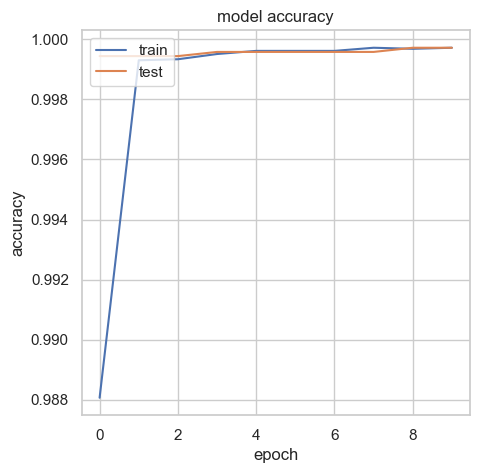

In [59]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

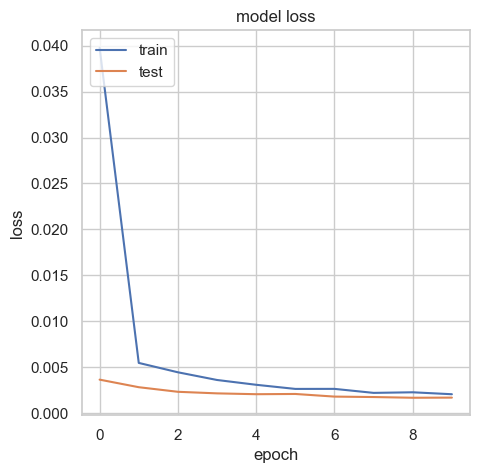

In [60]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
y_pred = np.where(model.predict({ 'input_1' : X_test_token['input_ids'] , 'input_2' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 54s 179ms/step


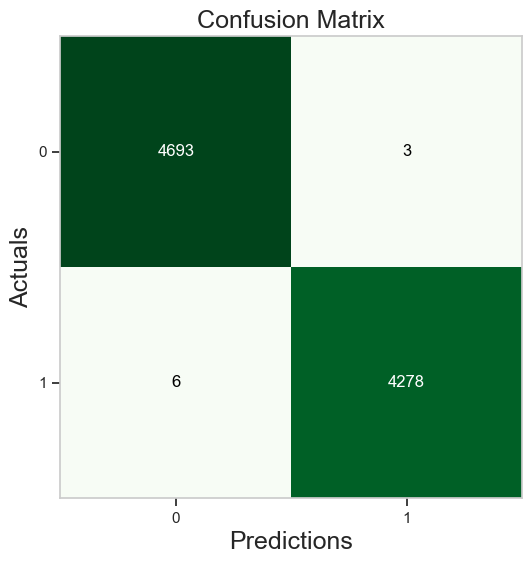

In [64]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [66]:
print(classification_report(Y_test,y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99872   0.99936   0.99904      4696
           1    0.99930   0.99860   0.99895      4284

    accuracy                        0.99900      8980
   macro avg    0.99901   0.99898   0.99900      8980
weighted avg    0.99900   0.99900   0.99900      8980



Custom data prediction

In [78]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated.Trump s election must not be allowed to serve as a permission slip to bigots everywhere that it s fine to be as awful as possible, because here in the land of the free and the home of the brave, everyone is protected. Everyone, regardless of color, class, gender, sexual orientation, or creed.Featured Photo by Chip Somodevilla/Getty Images'"

In [79]:
test_token = tokenize(test_text)
test_token

{'input_ids': <tf.Tensor: shape=(2190, 100), dtype=int32, numpy=
array([[ 101, 1039,  102, ...,    0,    0,    0],
       [ 101, 1051,  102, ...,    0,    0,    0],
       [ 101, 1052,  102, ...,    0,    0,    0],
       ...,
       [ 101, 1041,  102, ...,    0,    0,    0],
       [ 101, 1055,  102, ...,    0,    0,    0],
       [ 101, 1005,  102, ...,    0,    0,    0]])>, 'attention_mask': <tf.Tensor: shape=(2190, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>}

In [80]:
test_text_pred = np.where(model.predict({ 'input_1' : test_token['input_ids'] , 'input_2' : test_token['attention_mask']}) >=0.5,1,0)
test_text_pred

69/69 [==============================] - 13s 181ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [81]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake
